In [2]:
import cv2
import copy
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.ndimage import convolve
from vis import plot_intensity
from whitening import whiten

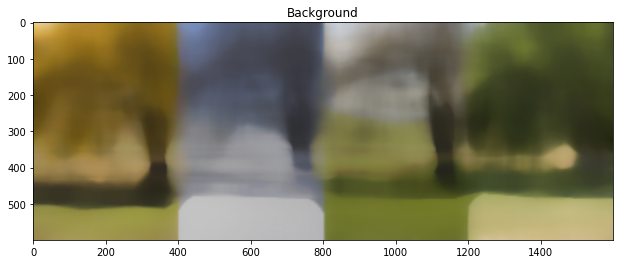

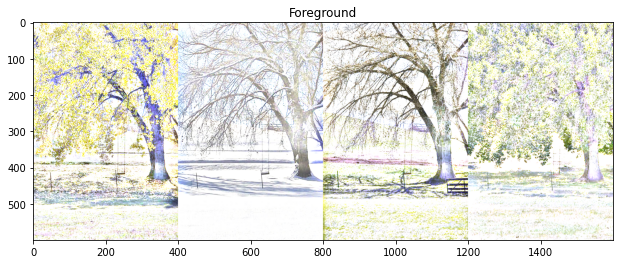

In [7]:
filename = 'seasons.jpeg'

im = cv2.imread(filename)
im = im[...,::-1]

foreground, background = whiten(im, kernel_size=20, downsample=4)

plt.figure(figsize=(12,4))
plt.title('Background')
plt.imshow(background)
plt.show()

plt.figure(figsize=(12,4))
plt.title('Foreground')
plt.imshow(foreground)
plt.show()

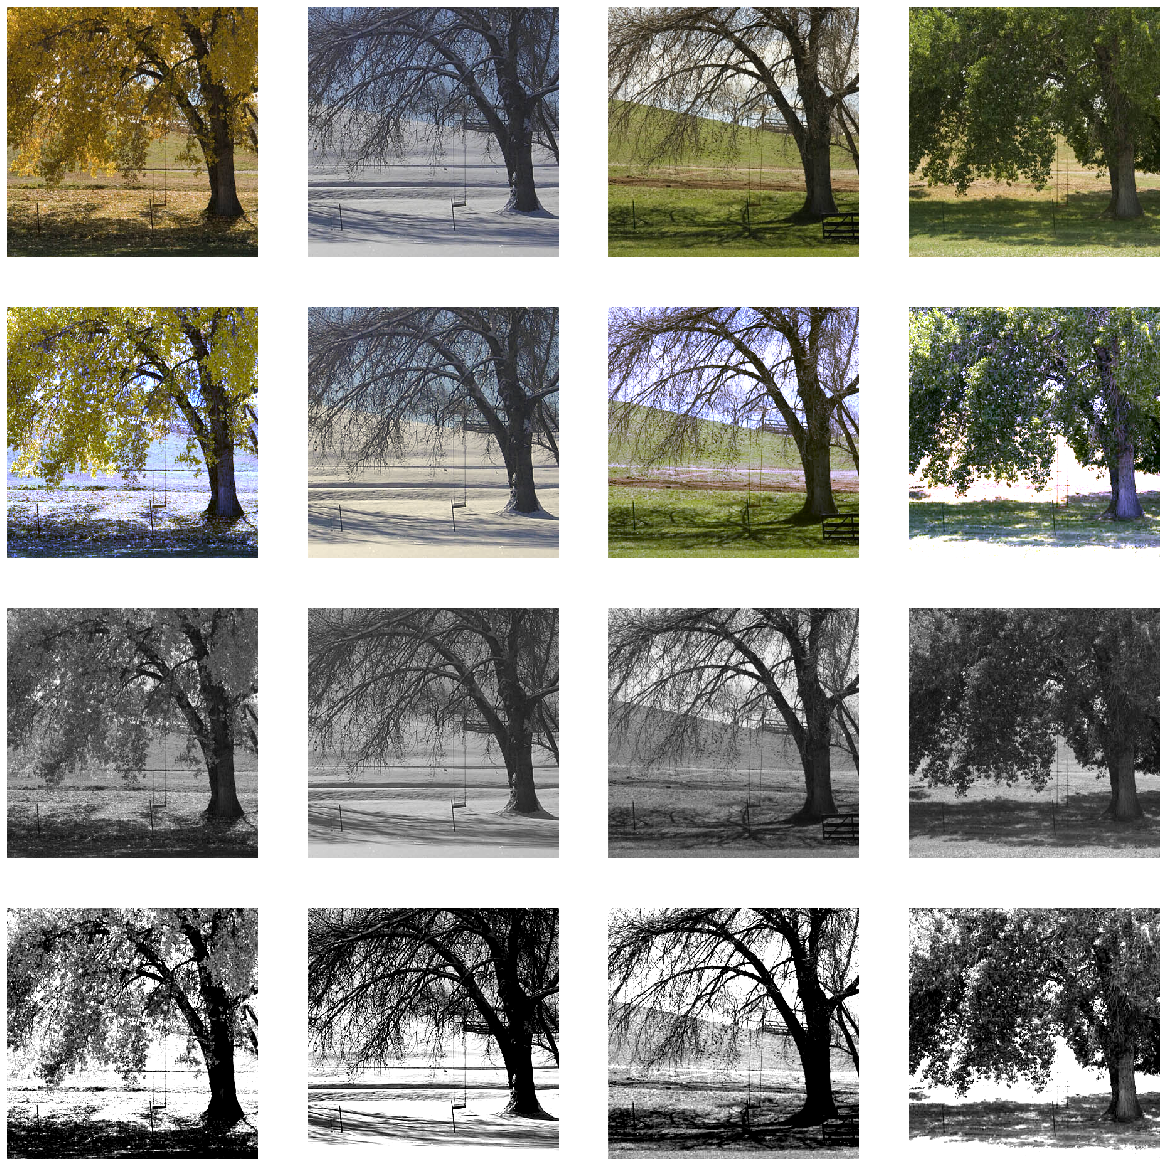

In [24]:
fig, ax = plt.subplots(4,4,figsize=(16,16))
fig.subplots_adjust(left=0, bottom=0, right=1, top=1)

for i in range(4):
    im_c = im[100:500,400*i:400*(i+1),:]

    ax[0,i].imshow(im_c)
    ax[0,i].set(xticks=[], yticks=[], frame_on=False)
    ax[0,i].axis('off')
    
    # Standardization
    im_c_ = (im_c-np.mean(im_c,axis=(0,1)))/np.median(im_c,axis=(0,1))
    im_c_ = np.clip(im_c_, -1, 1)
    im_c_ = (im_c_+1)/2
    
    ax[1,i].imshow(im_c_)
    ax[1,i].set(xticks=[], yticks=[], frame_on=False)
    ax[1,i].axis('off')
    
    im_g = cv2.cvtColor(im_c, cv2.COLOR_RGB2GRAY)    
    
    ax[2,i].imshow(im_g,cmap='gray')
    ax[2,i].set(xticks=[], yticks=[], frame_on=False)
    ax[2,i].axis('off')
    
    # Standardization
    im_g_ = (im_g-im_g.mean())/im_g.std()
    im_g_ = np.clip(im_g_, -1, 1)
    im_g_ = (im_g_+1)/2
    
    ax[3,i].imshow(im_g_,cmap='gray')
    ax[3,i].set(xticks=[], yticks=[], frame_on=False)
    ax[3,i].axis('off')

plt.show()

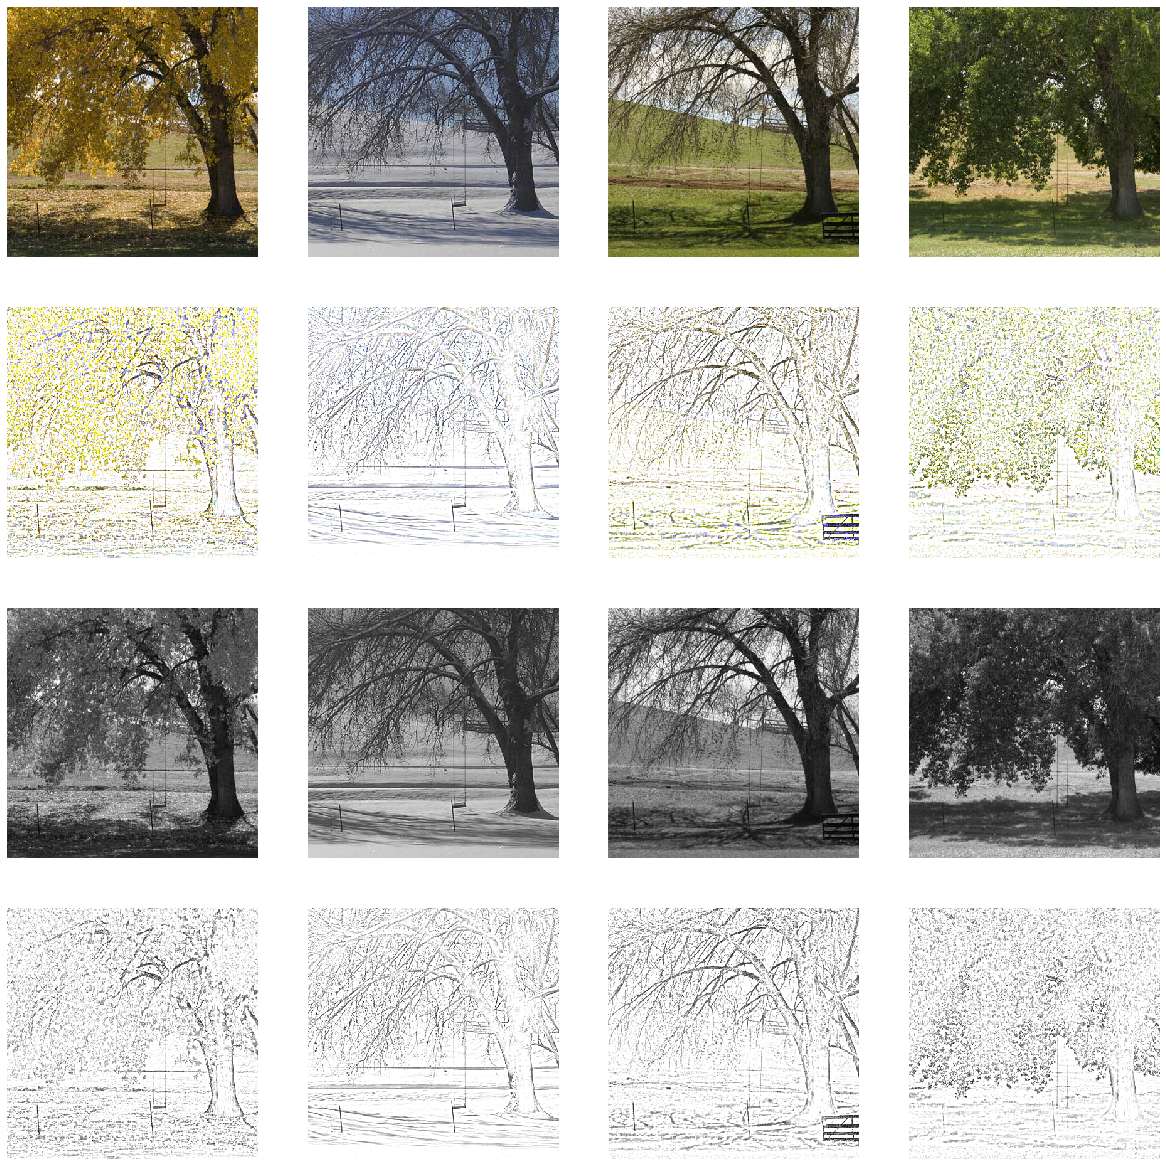

In [45]:
fig, ax = plt.subplots(4,4,figsize=(16,16))
fig.subplots_adjust(left=0, bottom=0, right=1, top=1)

for i in range(4):
    im_c = im[100:500,400*i:400*(i+1),:]

    ax[0,i].imshow(im_c)
    ax[0,i].set(xticks=[], yticks=[], frame_on=False)
    ax[0,i].axis('off')
    
    c_foreground, _ = whiten(im_c, kernel_size=3, downsample=4)
    
    ax[1,i].imshow(c_foreground)
    ax[1,i].set(xticks=[], yticks=[], frame_on=False)
    ax[1,i].axis('off')
    
    im_g = cv2.cvtColor(im_c, cv2.COLOR_RGB2GRAY)    
    
    ax[2,i].imshow(im_g,cmap='gray')
    ax[2,i].set(xticks=[], yticks=[], frame_on=False)
    ax[2,i].axis('off')
    
    g_foreground, _ = whiten(im_g, kernel_size=3, downsample=4)
    
    ax[3,i].imshow(g_foreground,cmap='gray')
    ax[3,i].set(xticks=[], yticks=[], frame_on=False)
    ax[3,i].axis('off')

plt.show()